# Iteration Results

In [1]:
import sys

import pandas as pd
import seaborn as sns

sys.path.append('../src')
import raybay
from utils import get_iter_df, get_percent_diff

## With 100 Iterations

In [2]:
full_df = pd.concat([get_iter_df(plan_type) for plan_type in ['random', 'bayes']])
full_df.groupby('plan_type').describe()

plan_iter                                               
              count   mean  std    min    25%    50%    75%    max
plan_type                                                         
bayes          10.0  100.0  0.0  100.0  100.0  100.0  100.0  100.0
random         10.0  100.0  0.0  100.0  100.0  100.0  100.0  100.0

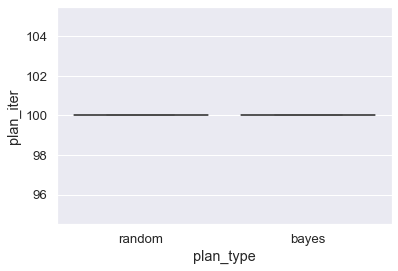

In [3]:
ax = sns.boxplot(x='plan_type', y='plan_iter', data=full_df)

### Compare plan iterations

In [4]:
def get_iter_diff(row):
    return get_percent_diff(row, 'plan_iter_x', 'plan_iter_y')

def get_compare(plan, ref, stop=False):
    df = pd.merge(
        get_iter_df(plan, stop),
        get_iter_df(ref, stop),
        on='patient')
    df['compare_type'] = plan + '2' + ref
    df['percent_diff'] = df.apply(get_iter_diff, axis=1)
    return df[['patient', 'compare_type', 'percent_diff']]

pair_list = [['bayes', 'random']]
compare_df = pd.concat([get_compare(*pair) for pair in pair_list]).reset_index(drop=True)
compare_df.groupby('compare_type').describe()

percent_diff                                   
                    count mean  std  min  25%  50%  75%  max
compare_type                                                
bayes2random         10.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

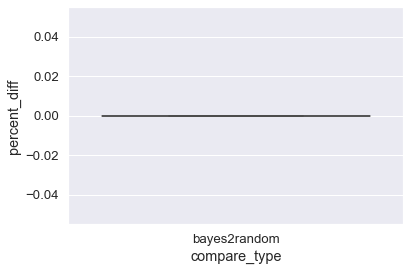

In [5]:
sns.boxplot(x='compare_type', y='percent_diff', data=compare_df);

## With Stopping Conditions

In [6]:
stop_df = pd.concat([get_iter_df(plan_type, stop=True) for plan_type in ['random', 'bayes']])
stop_df.groupby('plan_type').describe()

plan_iter                                                
              count  mean        std   min    25%   50%   75%   max
plan_type                                                          
bayes          10.0  36.8  14.148420  20.0  28.50  34.0  43.0  62.0
random         10.0  27.3   4.967673  20.0  23.25  29.0  30.0  33.0

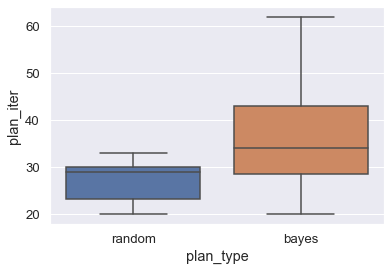

In [7]:
ax = sns.boxplot(x='plan_type', y='plan_iter', data=stop_df)

## Compare plan iterations

In [8]:
pair_list = [['bayes', 'random']]
compare_df = pd.concat([get_compare(*pair, stop=True) for pair in pair_list]).reset_index(drop=True)
compare_df.groupby('compare_type').describe()

percent_diff                                                      \
                    count      mean        std  min  25%       50%        75%   
compare_type                                                                    
bayes2random         10.0  33.96633  43.774856  0.0  0.0  7.575758  64.309764   

                          
                     max  
compare_type              
bayes2random  106.666667

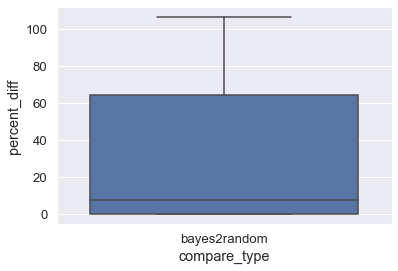

In [9]:
ax = sns.boxplot(x='compare_type', y='percent_diff', data=compare_df)

### Compare to 100 iterations

In [10]:
def get_iter_diff(row):
    return get_percent_diff(row, 'plan_iter_stop', 'plan_iter_full')

compare_df = pd.merge(
    full_df,
    stop_df,
    on=['patient', 'plan_type'],
    suffixes=['_full', '_stop']
)
compare_df = compare_df[compare_df['plan_type'].isin(['random', 'bayes'])]
compare_df['percent_diff'] = compare_df.apply(get_iter_diff, axis=1)
compare_df.groupby('plan_type')['percent_diff'].describe()

,count,mean,std,min,25%,50%,75%,max
plan_type,,,,,,,,
bayes,10.0,-63.2,14.148420,-80.0,-71.50,-66.0,-57.0,-38.0
random,10.0,-72.7,4.967673,-80.0,-76.75,-71.0,-70.0,-67.0


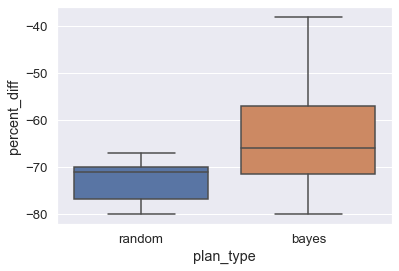

In [11]:
ax = sns.boxplot(x='plan_type', y='percent_diff', data=compare_df)